In [14]:
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ecdf

In [15]:
files = os.listdir("csvs")
files = [file for file in files if "reshuffling" in file]

In [16]:
res = []
for file in files:
    if not file.endswith(".csv"):
        continue
    tmp = pd.read_csv(os.path.join("csvs", file))
    tmp = tmp[((tmp["final_iteration"] == True) | (tmp["iteration"].isin([250, 500]))) & (tmp["metric"] != "balanced_accuracy")]
    tmp.loc[:, "file"] = file
    res.append(tmp)

In [17]:
dat = pd.concat(res)

In [18]:
rs_retrained_no_reshuffling = dat[(dat["optimizer"] == "random") & (dat["retrained"] == True) & (dat["reshuffled"] == False) & (dat["final_iteration"] == True)]

In [19]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

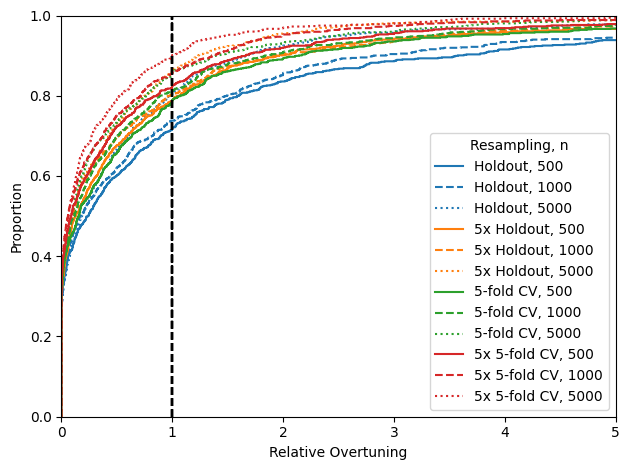

In [20]:
resampling_levels = {"holdout": "Holdout", "repeatedholdout": "5x Holdout", "cv": "5-fold CV", "cv_repeated": "5x 5-fold CV"}
train_valid_sizes = [500, 1000, 5000]
linestyles = {500: "-", 1000: "--", 5000: ":"}
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = {"holdout": colors[0], "repeatedholdout": colors[1], "cv": colors[2], "cv_repeated": colors[3]}

for resampling in resampling_levels.keys():
    for train_valid_size in train_valid_sizes:
        subset = rs_retrained_no_reshuffling[
            (rs_retrained_no_reshuffling["no_progress"] == False) &
            (rs_retrained_no_reshuffling["train_valid_size"] == train_valid_size) &
            (rs_retrained_no_reshuffling["resampling"] == resampling)
        ]
        plt.ecdf(
            data=subset,
            x="overtuning_relative",
            label=f"{resampling_levels[resampling]}, {train_valid_size}",
            color=colors[resampling],
            linestyle=linestyles[train_valid_size]
        )
        plt.xlabel("Relative Overtuning")
        plt.ylabel("Proportion")
        plt.legend(title="Resampling, n")
        plt.xlim(left=0, right=5)
        plt.tight_layout()
        plt.axvline(x=1.0, color="black", linestyle="--")
plt.savefig("/tmp/ecdf_reshuffling_resampling_n.pdf")

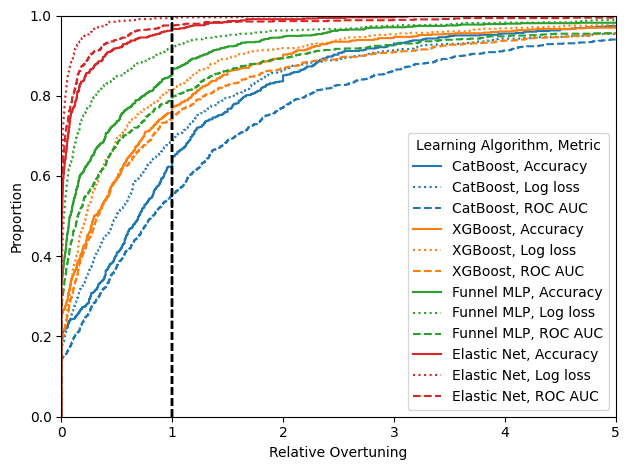

In [21]:
classifier_levels = {"catboost": "CatBoost", "xgboost": "XGBoost", "funnel_mlp": "Funnel MLP", "logreg": "Elastic Net"}
metric_levels = {"accuracy": "Accuracy", "logloss": "Log loss", "auc": "ROC AUC"}
linestyles = {"accuracy": "-", "auc": "--", "logloss": ":"}
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = {"catboost": colors[0], "xgboost": colors[1], "funnel_mlp": colors[2], "logreg": colors[3]}

for classifier in classifier_levels.keys():
    for metric in metric_levels.keys():
        subset = rs_retrained_no_reshuffling[
            (rs_retrained_no_reshuffling["no_progress"] == False) &
            (rs_retrained_no_reshuffling["metric"] == metric) &
            (rs_retrained_no_reshuffling["classifier"] == classifier)
        ]
        plt.ecdf(
            data=subset,
            x="overtuning_relative",
            label=f"{classifier_levels[classifier]}, {metric_levels[metric]}",
            color=colors[classifier],
            linestyle=linestyles[metric]
        )
        plt.xlabel("Relative Overtuning")
        plt.ylabel("Proportion")
        plt.legend(title="Learning Algorithm, Metric")
        plt.xlim(left=0, right=5)
        plt.tight_layout()
        plt.axvline(x=1.0, color="black", linestyle="--")
plt.savefig("/tmp/ecdf_reshuffling_classifier_metric.pdf")

In [22]:
bo_retrained_no_reshuffling = dat[(dat["optimizer"].isin(["random", "hebo", "smac"])) & (dat["retrained"] == True) & (dat["reshuffled"] == False) & (dat["iteration"] == 250)]

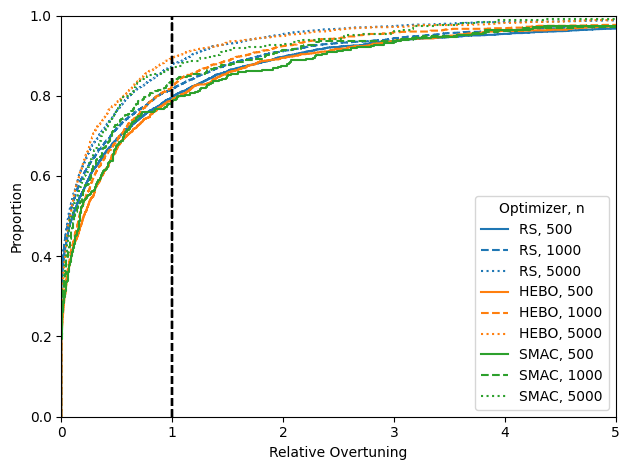

In [23]:
optimizer_levels = {"random": "RS", "hebo": "HEBO", "smac": "SMAC"}
train_valid_sizes = [500, 1000, 5000]
linestyles = {500: "-", 1000: "--", 5000: ":"}
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = {"random": colors[0], "hebo": colors[1], "smac": colors[2]}

for optimizer in optimizer_levels.keys():
    for train_valid_size in train_valid_sizes:
        subset = bo_retrained_no_reshuffling[
            (bo_retrained_no_reshuffling["no_progress"] == False) &
            (bo_retrained_no_reshuffling["train_valid_size"] == train_valid_size) &
            (bo_retrained_no_reshuffling["optimizer"] == optimizer)
        ]
        plt.ecdf(
            data=subset,
            x="overtuning_relative",
            label=f"{optimizer_levels[optimizer]}, {train_valid_size}",
            color=colors[optimizer],
            linestyle=linestyles[train_valid_size]
        )
        plt.xlabel("Relative Overtuning")
        plt.ylabel("Proportion")
        plt.legend(title="Optimizer, n")
        plt.xlim(left=0, right=5)
        plt.tight_layout()
        plt.axvline(x=1.0, color="black", linestyle="--")
plt.savefig("/tmp/ecdf_reshuffling_optimizer.pdf")

In [24]:
hebo_es_retrained_no_reshuffling = dat[(dat["optimizer"].isin(["hebo", "hebo_makarova"])) & (dat["retrained"] == True) & (dat["reshuffled"] == False) & (dat["resampling"] == "cv") & (dat["final_iteration"] == True)]

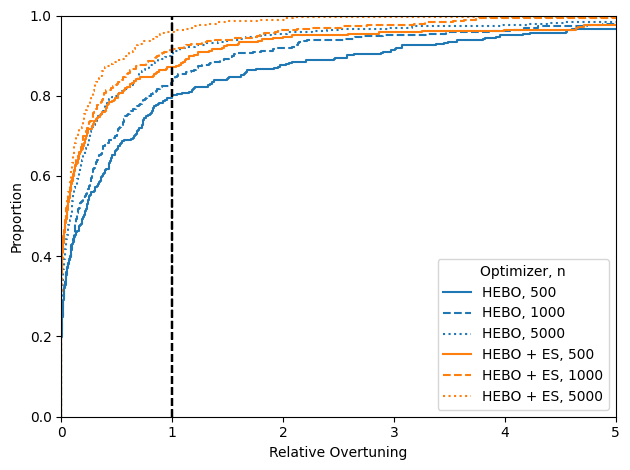

In [25]:
optimizer_levels = {"hebo": "HEBO", "hebo_makarova": "HEBO + ES"}
train_valid_sizes = [500, 1000, 5000]
linestyles = {500: "-", 1000: "--", 5000: ":"}
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = {"hebo": colors[0], "hebo_makarova": colors[1]}

for optimizer in optimizer_levels.keys():
    for train_valid_size in train_valid_sizes:
        subset = hebo_es_retrained_no_reshuffling[
            (hebo_es_retrained_no_reshuffling["no_progress"] == False) &
            (hebo_es_retrained_no_reshuffling["train_valid_size"] == train_valid_size) &
            (hebo_es_retrained_no_reshuffling["optimizer"] == optimizer)
        ]
        plt.ecdf(
            data=subset,
            x="overtuning_relative",
            label=f"{optimizer_levels[optimizer]}, {train_valid_size}",
            color=colors[optimizer],
            linestyle=linestyles[train_valid_size]
        )
        plt.xlabel("Relative Overtuning")
        plt.ylabel("Proportion")
        plt.legend(title="Optimizer, n")
        plt.xlim(left=0, right=5)
        plt.tight_layout()
        plt.axvline(x=1.0, color="black", linestyle="--")
plt.savefig("/tmp/ecdf_reshuffling_hebo_es.pdf")

In [26]:
group_keys = [
    "seed", "data_id", "metric", "train_valid_size",
    "resampling", "reshuffled", "classifier", "retrained"
]

grouped = hebo_es_retrained_no_reshuffling[hebo_es_retrained_no_reshuffling["no_progress"] == False].groupby(group_keys)

valid_groups = grouped.filter(lambda g: set(g["optimizer"]) == {"hebo", "hebo_makarova"})

pivot_test_incumbent = valid_groups.pivot_table(
    index=group_keys,
    columns="optimizer",
    values="test_incumbent"
)
pivot_test_incumbent["delta_test_incumbent"] = pivot_test_incumbent["hebo_makarova"] - pivot_test_incumbent["hebo"]
hebo_es_retrained_no_reshuffling_delta_test_incumbent = pivot_test_incumbent.reset_index()

pivot_overtuning = valid_groups.pivot_table(
    index=group_keys,
    columns="optimizer",
    values="overtuning"
)
pivot_overtuning["delta_overtuning"] = pivot_overtuning["hebo_makarova"] - pivot_overtuning["hebo"]
hebo_es_retrained_no_reshuffling_delta_overtuning = pivot_overtuning.reset_index()

merged = pd.merge(
    hebo_es_retrained_no_reshuffling_delta_test_incumbent[
        group_keys + ["delta_test_incumbent"]
    ],
    hebo_es_retrained_no_reshuffling_delta_overtuning[
        group_keys + ["delta_overtuning"]
    ],
    on=group_keys
)

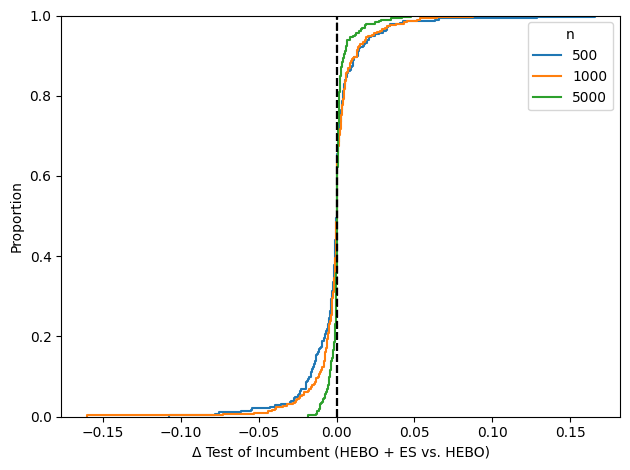

In [27]:
train_valid_sizes = [500, 1000, 5000]

for train_valid_size in train_valid_sizes:
    subset = hebo_es_retrained_no_reshuffling_delta_test_incumbent[
        (hebo_es_retrained_no_reshuffling_delta_test_incumbent["train_valid_size"] == train_valid_size)
    ]
    plt.ecdf(
        data=subset,
        x="delta_test_incumbent",
        label=f"{train_valid_size}"
    )
    plt.xlabel("Δ Test of Incumbent (HEBO + ES vs. HEBO)")
    plt.ylabel("Proportion")
    plt.legend(title="n")
    plt.tight_layout()
    plt.axvline(x=0.0, color="black", linestyle="--")
plt.savefig("/tmp/ecdf_reshuffling_hebo_es_delta_test_incumbent.pdf")

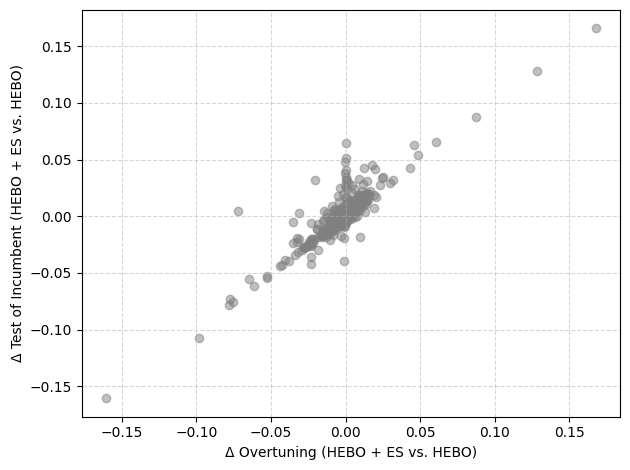

In [28]:
plt.figure()
plt.scatter(
    merged["delta_overtuning"],
    merged["delta_test_incumbent"],
    color="grey",
    alpha=0.5
)

plt.xlabel("Δ Overtuning (HEBO + ES vs. HEBO)")
plt.ylabel("Δ Test of Incumbent (HEBO + ES vs. HEBO)")

plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig("/tmp/scatter_reshuffling_hebo_es_delta_test_overtuning_incumbent.pdf")

In [29]:
rs_retrained = dat[(dat["optimizer"] == "random") & (dat["retrained"] == True) & (dat["final_iteration"] == True)]

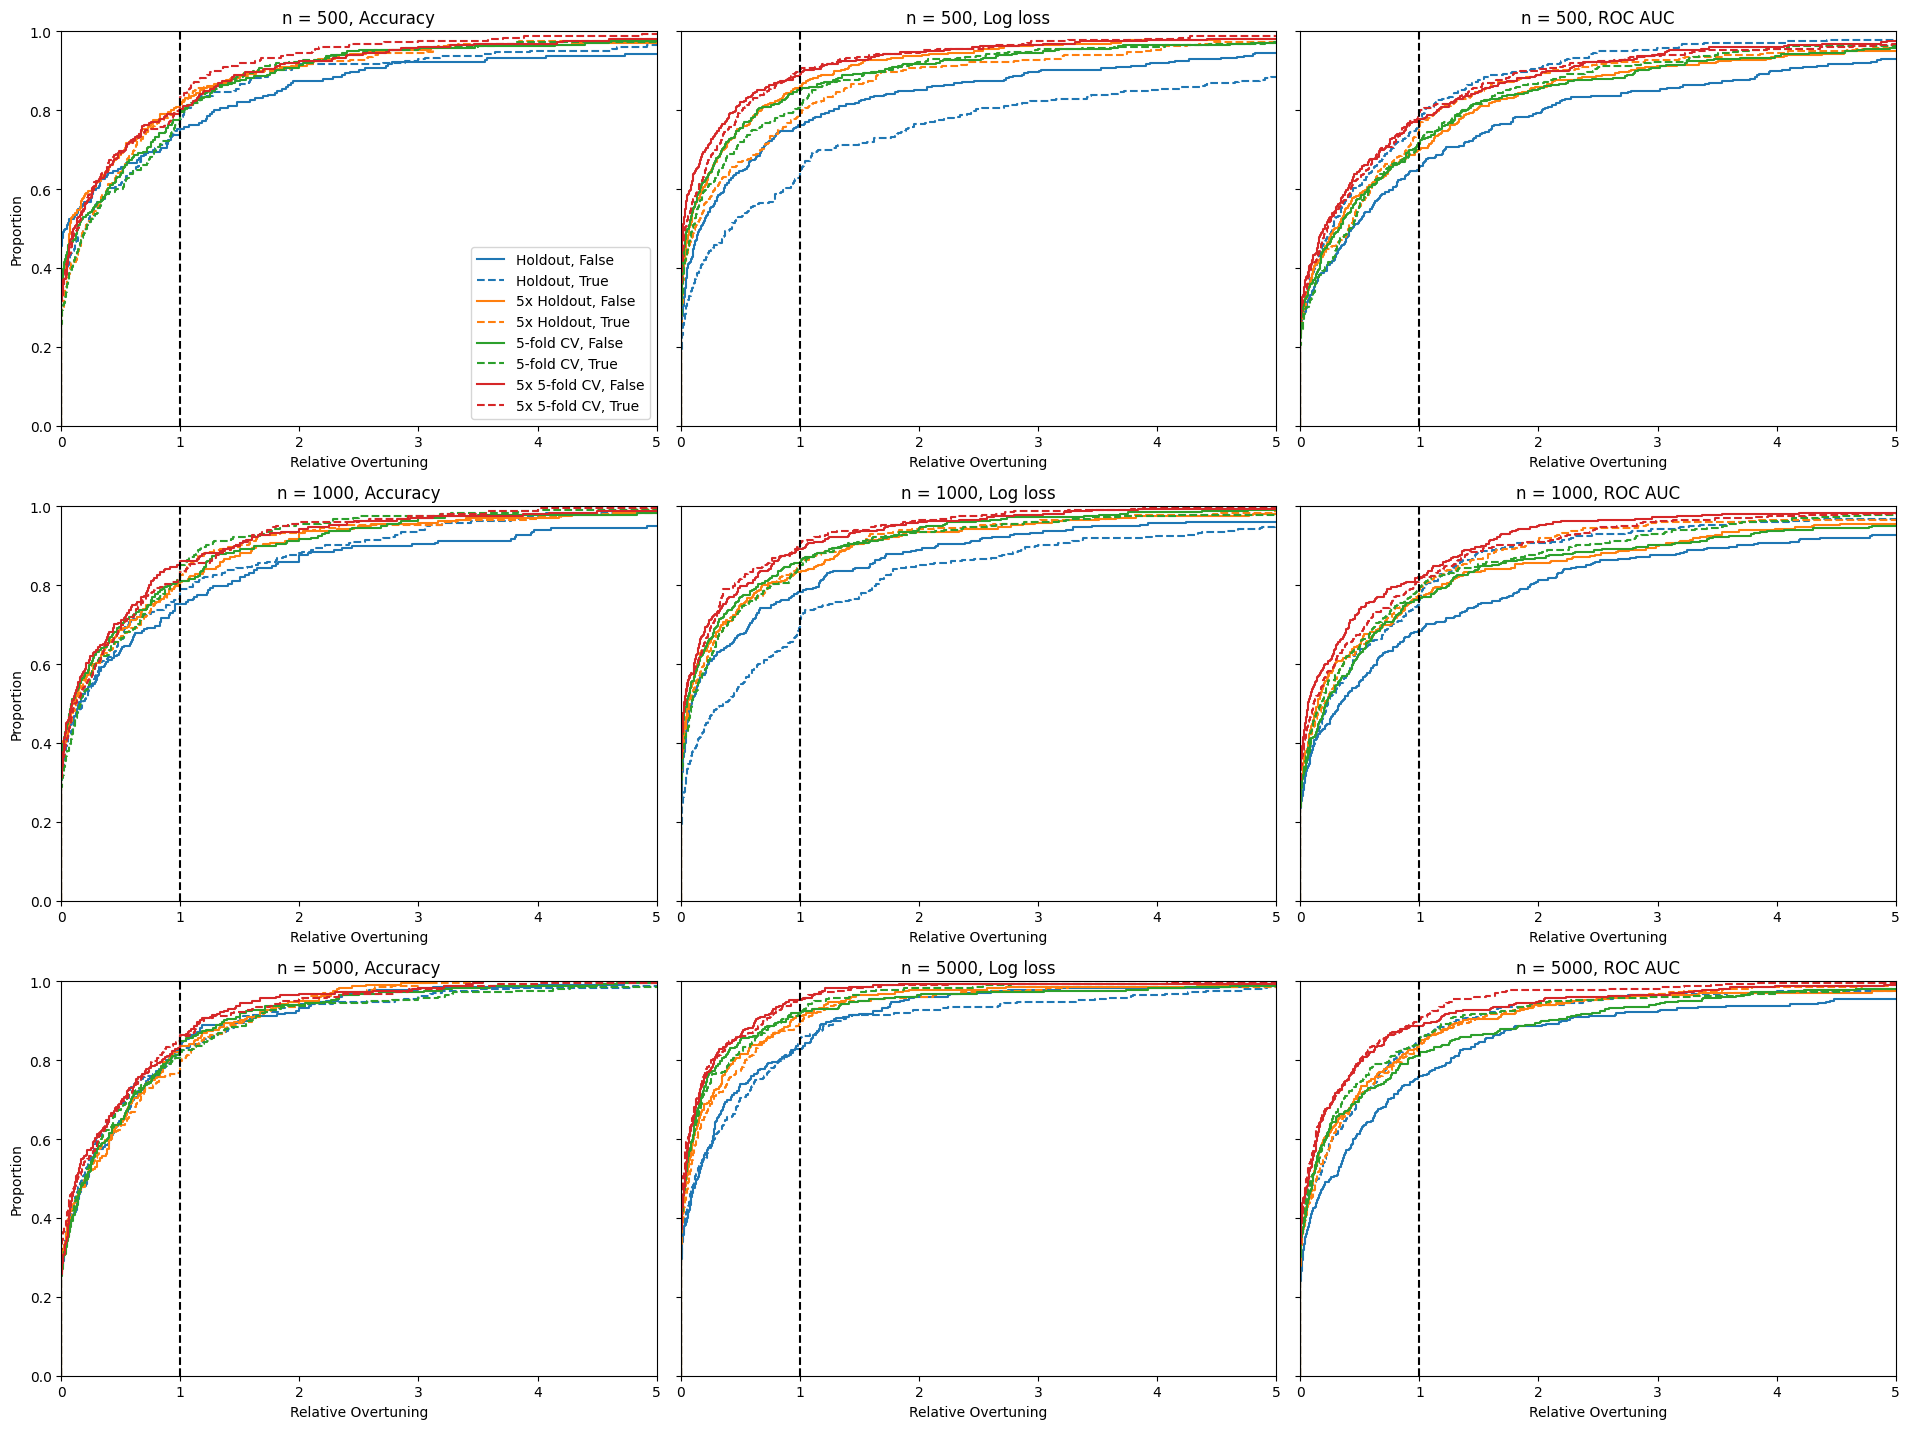

In [30]:
resampling_levels = {"holdout": "Holdout", "repeatedholdout": "5x Holdout", "cv": "5-fold CV", "cv_repeated": "5x 5-fold CV"}
reshuffleds = [False, True]
linestyles = {False: "-", True: "--"}
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = {"holdout": colors[0], "repeatedholdout": colors[1], "cv": colors[2], "cv_repeated": colors[3]}

train_valid_sizes_levels = {500: "500", 1000: "1000", 5000: "5000"}
metrics_levels = {"accuracy": "Accuracy", "logloss": "Log loss", "auc": "ROC AUC"}
fig, axes = plt.subplots(3, 3, figsize=(19.2, 14.4), sharey=True)

for idx_row, train_valid_size in enumerate(train_valid_sizes_levels.keys()):
    for idx_column, metric in enumerate(metrics_levels.keys()):
        ax = axes[idx_row, idx_column]
        for resampling in resampling_levels.keys():
            for reshuffled in reshuffleds:
                subset = rs_retrained[
                    (rs_retrained["no_progress"] == False) &
                    (rs_retrained["reshuffled"] == reshuffled) &
                    (rs_retrained["resampling"] == resampling) &
                    (rs_retrained["metric"] == metric) &
                    (rs_retrained["train_valid_size"] == train_valid_size)
                ]
                ax.ecdf(
                    data=subset,
                    x="overtuning_relative",
                    label=f"{resampling_levels[resampling]}, {reshuffled}",
                    color=colors[resampling],
                    linestyle=linestyles[reshuffled]
                )
        ax.set_title(f"n = {train_valid_sizes_levels[train_valid_size]}, {metrics_levels[metric]}")
        ax.set_xlabel("Relative Overtuning")
        ax.axvline(x=1.0, color="black", linestyle="--")
        if idx_row == 0 and idx_column == 0:
            ax.legend()
        if idx_column == 0:
            ax.set_ylabel("Proportion")
        ax.set_xlim(left=0, right=5)

fig.tight_layout()
plt.savefig("/tmp/ecdf_reshuffling_reshuffled_by_n_and_metric.pdf")